# Data Loading


In [30]:
!pip install wget

In [31]:
import string
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import wget
import os

print('Downloading dataset...')

# The URL for the dataset zip file.
url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'

# Download the file (if we haven't already)
if not os.path.exists('./cola_public_1.1.zip'):
    wget.download(url, './cola_public_1.1.zip')

# Unzip the dataset (if we haven't already)
if not os.path.exists('./cola_public/'):
    !unzip cola_public_1.1.zip
    
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Mounted at /content/drive
Number of training sentences: 8,551



,sentence_source,label,label_notes,sentence
4846,ks08,1,NaN,Which city does Fred think that you believe th...
7003,sgww85,1,NaN,Kim sang and Sandy danced.
6336,c_13,1,NaN,John loves himself.
500,bc01,0,*,John is wanted to win.
7794,ad03,1,NaN,Gilgamesh has been fighting the dragon.
8068,ad03,0,*,Gilgamesh might have not been reading the cune...
220,cj99,0,*,The more people everyone who likes pays attent...
3952,ks08,1,NaN,The school board leader asked a question of th...
2406,l-93,1,NaN,The paper incorporates the new results.
408,bc01,1,NaN,John considers him a nice guy.


In [32]:
def double_sentence(sentence):

    return sentence + ' ' + sentence

def rev_concat(sentence):

    return sentence + ' ' + rev_sentence(sentence)

def rev_sentence(sentence): 
  
    # first split the string into words 
    words = sentence.split(' ') 
  
    # then reverse the split string list and join using space 
    reverse_sentence = ' '.join(reversed(words)) 
  
    # finally return the joined string 
    return reverse_sentence 

In [33]:
temp = df.sentence.tolist()
new_v2 = []
for i in temp:
  new_v2.append(rev_concat(i))
df.sentence = new_v2

In [34]:
df.sentence = df.sentence.str.translate(str.maketrans('', '', string.punctuation))

We will split the data into train, val, and test sets.  
`train_texts`, `val_texts`, and `test_texts` should contain a list of text examples in the dataset.


In [35]:
# 0.15 for val, 0.15 for test, 0.7 for train
val_size = int(df.shape[0] * 0.15)
test_size = int(df.shape[0] * 0.15)

# Shuffle the data
df = df.sample(frac=1)
# Split df to test/val/train
test_df = df[:test_size]
val_df = df[test_size:test_size+val_size]
train_df = df[test_size+val_size:]


train_texts, train_labels = list(train_df.sentence), list(train_df.label)
val_texts, val_labels     = list(val_df.sentence), list(val_df.label)
test_texts, test_labels   = list(test_df.sentence), list(test_df.label)


# Check that idces do not overlap
assert set(train_df.index).intersection(set(val_df.index)) == set({})
assert set(test_df.index).intersection(set(train_df.index)) == set({})
assert set(val_df.index).intersection(set(test_df.index)) == set({})
# Check that all idces are present
assert df.shape[0] == len(train_labels) + len(val_labels) + len(test_labels)

# Sizes
print(
    f"Size of initial data: {df.shape[0]}\n"
    f"Train size: {len(train_labels)}\n"
    f"Val size: {len(val_labels)}\n"
    f"Test size: {len(test_labels)}\n"
)

Size of initial data: 8551
Train size: 5987
Val size: 1282
Test size: 1282



In [36]:
train_texts[:10] # Just checking the examples in train_text

['to hurt oneself is stupid stupid is oneself hurt to',
 'I saw the brilliant one one brilliant the saw I',
 'Who did you give pictures of to friends of of friends to of pictures give you did Who',
 'The cat that the dog that the rat bit chased died died chased bit rat the that dog the that cat The',
 'Every restaurant that advertises in any of these papers happens to have four stars in the handbook handbook the in stars four have to happens papers these of any in advertises that restaurant Every',
 'It is important the more you to eat the more careful to be be to careful more the eat to you more the important is It',
 'John remained somewhat calm calm somewhat remained John',
 'The ball rolled rolled ball The',
 'She turned down his offer offer his down turned She',
 'What do you remember where we bought bought we where remember you do What']

# Download and Load GloVe Embeddings
We will use GloVe embedding parameters to initialize our layer of word representations / embedding layer.
Let's download and load glove.





In [37]:
#@title Download GloVe word embeddings

# === Download GloVe word embeddings
# !wget http://nlp.stanford.edu/data/glove.6B.zip

# === Unzip word embeddings and use only the top 50000 word embeddings for speed
# !unzip glove.6B.zip
# !head -n 50000 glove.6B.300d.txt > glove.6B.300d__50k.txt

# === Download Preprocessed version
!wget https://docs.google.com/uc?id=1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu -O glove_split.aa
!wget https://docs.google.com/uc?id=1LF2yD2jToXriyD-lsYA5hj03f7J3ZKaY -O glove_split.ab
!wget https://docs.google.com/uc?id=1N1xnxkRyM5Gar7sv4d41alyTL92Iip3f -O glove_split.ac
!cat glove_split.?? > 'glove.6B.300d__50k.txt'

--2021-05-07 11:12:12--  https://docs.google.com/uc?id=1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu
Resolving docs.google.com (docs.google.com)... 108.177.125.101, 108.177.125.138, 108.177.125.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kmqclk3scquaig2efp6ssqnuptrnpuf0/1620385875000/14514704803973256873/*/1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu [following]
--2021-05-07 11:12:17--  https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kmqclk3scquaig2efp6ssqnuptrnpuf0/1620385875000/14514704803973256873/*/1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu
Resolving doc-0k-0g-docs.googleusercontent.com (doc-0k-0g-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-0k-0g-docs.googleusercontent.com (doc-0k-0g-docs.googleusercontent.com)|108.17

## Load GloVe Embeddings

In [38]:
def load_glove(glove_path, embedding_dim):
    with open(glove_path) as f:
        token_ls = [PAD_TOKEN, UNK_TOKEN]
        embedding_ls = [np.zeros(embedding_dim), np.random.rand(embedding_dim)]
        for line in f:
            token, raw_embedding = line.split(maxsplit=1)
            token_ls.append(token)
            embedding = np.array([float(x) for x in raw_embedding.split()])
            embedding_ls.append(embedding)
        embeddings = np.array(embedding_ls)
    return token_ls, embeddings

PAD_TOKEN = '<PAD>'
UNK_TOKEN = '<UNK>'
EMBEDDING_DIM=300 # dimension of Glove embeddings
glove_path = "glove.6B.300d__50k.txt"
vocab, embeddings = load_glove(glove_path, EMBEDDING_DIM)

## Import packages

In [39]:
!pip install sacremoses

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os
import pandas as pd
import sacremoses
from torch.utils.data import dataloader, Dataset
from tqdm.auto import tqdm

# Tokenize text data.
We will use the `tokenize` function to convert text data into sequence of indices.

In [40]:
def tokenize(data, labels, tokenizer, vocab, max_seq_length=128):
    vocab_to_idx = {word: i for i, word in enumerate(vocab)}
    text_data = []
    label_data = []
    for ex in tqdm(data):
        tokenized = tokenizer.tokenize(ex.lower())
        ids = [vocab_to_idx.get(token, 1) for token in tokenized]
        text_data.append(ids)
    return text_data, labels
tokenizer = sacremoses.MosesTokenizer()
train_data_indices, train_labels = tokenize(train_texts, train_labels, tokenizer, vocab)
val_data_indices, val_labels = tokenize(val_texts, val_labels, tokenizer, vocab)
test_data_indices, test_labels = tokenize(test_texts, test_labels, tokenizer, vocab)

In [41]:
print("\nTrain text first 5 examples:\n", train_data_indices[:5])
print("\nTrain labels first 5 examples:\n", train_labels[:5])


Train text first 5 examples:
 [[6, 2090, 25994, 16, 8981, 8981, 16, 25994, 2090, 6], [43, 824, 2, 6522, 50, 50, 6522, 2, 824, 43], [40, 121, 83, 457, 2492, 5, 6, 1097, 5, 5, 1097, 6, 5, 2492, 457, 83, 121, 40], [2, 5452, 14, 2, 2928, 14, 2, 10786, 1596, 10297, 433, 433, 10297, 1596, 10786, 2, 14, 2928, 2, 14, 5452, 2], [361, 2553, 14, 43031, 8, 132, 5, 160, 3272, 3373, 6, 35, 135, 1571, 8, 2, 18262, 18262, 2, 8, 1571, 135, 35, 6, 3373, 3272, 160, 5, 132, 8, 43031, 14, 2553, 361]]

Train labels first 5 examples:
 [1, 1, 1, 0, 1]


# Create DataLoaders 

In [42]:
import numpy as np
import torch
from torch.utils.data import Dataset

class SpamDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list, max_sent_length=128):
        """
        @param data_list: list of data tokens 
        @param target_list: list of data targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        self.max_sent_length = max_sent_length
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key, max_sent_length=None):
        """
        Triggered when you call dataset[i]
        """
        if max_sent_length is None:
            max_sent_length = self.max_sent_length
        token_idx = self.data_list[key][:max_sent_length]
        label = self.target_list[key]
        return [token_idx, label]

    def spam_collate_func(self,batch):
        """
        Customized function for DataLoader that dynamically pads the batch so that all 
        data have the same length
        """ 
        data_list = [] # store padded sequences
        label_list = []
        max_batch_seq_len = None # the length of longest sequence in batch
                                 # if it is less than self.max_sent_length
                                 # else max_batch_seq_len = self.max_sent_length

        """
          # Pad the sequences in your data 
          # if their length is less than max_batch_seq_len
          # or trim the sequences that are longer than self.max_sent_length
          # return padded data_list and label_list

        """
        label_list = [datum[1] for datum in batch]
        max_batch_seq_len = max(len(datum[0]) for datum in batch)
        if max_batch_seq_len > self.max_sent_length:
            max_batch_seq_len = self.max_sent_length

        for datum in batch:
            padded_vec = np.pad(np.array(datum[0]), 
                                    pad_width=((0,max_batch_seq_len-len(datum[0]))), 
                                    mode="constant", constant_values=0)
            data_list.append(padded_vec)
        data_list = torch.from_numpy(np.array(data_list))
        label_list = torch.LongTensor(label_list)        

        return [data_list, label_list]

BATCH_SIZE = 64
max_sent_length=128
train_dataset = SpamDataset(train_data_indices, train_labels, max_sent_length)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=train_dataset.spam_collate_func,
                                           shuffle=True)

val_dataset = SpamDataset(val_data_indices, val_labels, train_dataset.max_sent_length)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=train_dataset.spam_collate_func,
                                           shuffle=False)

test_dataset = SpamDataset(test_data_indices, test_labels, train_dataset.max_sent_length)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=train_dataset.spam_collate_func,
                                           shuffle=False)



Let's try to print out an batch from train_loader.


In [43]:
data_batch, labels = next(iter(train_loader))
print("data batch dimension: ", data_batch.size())
print("data_batch: ", data_batch)
print("labels: ", labels)

data batch dimension:  torch.Size([64, 34])
data_batch:  tensor([[25838,  2357,     2,  ...,     0,     0,     0],
        [15976,    16, 17352,  ...,     0,     0,     0],
        [   39,  1751,    45,  ...,     0,     0,     0],
        ...,
        [ 1453, 17788,   433,  ...,     0,     0,     0],
        [    2,     8,  4148,  ...,     0,     0,     0],
        [ 1117,  5254,  5874,  ...,     0,     0,     0]])
labels:  tensor([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])


# Build a LSTM Classifier

In [44]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class LSTMClassifier(nn.Module):
    """
    LSTMClassifier classification model
    """
    def __init__(self, embeddings, hidden_size, num_layers, num_classes, bidirectional, dropout_prob=0.3):
        super().__init__()
        self.embedding_layer = self.load_pretrained_embeddings(embeddings)
        self.dropout = None
        self.lstm = None
        self.non_linearity = None # For example, ReLU
        self.clf = None # classifier layer
        """
           define the components of your BiLSTM Classifier model

        """
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = nn.Dropout(p = dropout_prob)
        self.lstm = nn.LSTM(embeddings.shape[1], hidden_size, num_layers, batch_first=True, 
                            bidirectional=bidirectional, dropout=0.3)
        self.relu = nn.ReLU()
        # self.clf = nn.Linear(hidden_size*2, num_classes)
        self.clf = nn.Linear(hidden_size, num_classes)
    
    def load_pretrained_embeddings(self, embeddings):

        embedding_layer = nn.Embedding(embeddings.shape[0], embeddings.shape[1], padding_idx=0)
        embedding_layer.weight.data = torch.Tensor(embeddings).float()
        return embedding_layer


    def forward(self, inputs):
        logits = None

        batch_size = inputs.size()[0] # inputs : batch_sz, seq_len
        out = self.dropout(self.embedding_layer(inputs))
        out, _ = self.lstm(out, None)
        out = out.mean(1)
        out = self.relu(out)
        #out = self.relu(torch.mean(out,1))
        logits = self.clf(out)
        return logits

First, we will define an evaluation function that will return the accuracy of the model. We will use this to compute validation accuracy and test accuracy of the model given a dataloader.

In [45]:
def evaluate(model, dataloader, device):
    accuracy = None
    model.eval()

    n_correct = n_total = 0 
    model.eval()
    with torch.no_grad():
        
        for (data_batch, batch_labels) in dataloader:
            out = model(data_batch.to(device))
            max_scores, preds = out.max(dim=1)
            #preds = np.argmax(out, axis=1).cpu().numpy()
            n_correct += np.sum(preds.cpu().numpy() == batch_labels.numpy())
            n_total += out.shape[0]
    accuracy = n_correct*1.0/n_total
    return accuracy 

# Initialize the LSTM classifier model, criterion and optimizer


In [46]:
# BiLSTM hyperparameters
hidden_size = 32
num_layers = 1
num_classes = 2
bidirectional=False
torch.manual_seed(1234)

# if cuda exists, use cuda, else run on cpu
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device=torch.device('cpu')

model = LSTMClassifier(embeddings, hidden_size, num_layers, num_classes, bidirectional)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


# Train model with early stopping 

In [47]:
train_loss_history = []
val_accuracy_history = []
best_val_accuracy = 0
n_no_improve = 0
early_stop_patience=2
NUM_EPOCHS=10
  
for epoch in tqdm(range(NUM_EPOCHS)):
    model.train() # this enables regularization, which we don't currently have
    for i, (data_batch, batch_labels) in enumerate(train_loader):
        """
           Code for training lstm
           Keep track of training of for each batch using train_loss_history
        """
        preds = model(data_batch.to(device))
        loss = criterion(preds, batch_labels.to(device))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss_history.append(loss.item())
        
    # The end of a training epoch 


    cur_val_accuracy = evaluate(model, val_loader, device=device)
    val_accuracy_history.append(cur_val_accuracy)
    print("epoch: {}, val_accuracy: {}".format(epoch+1, cur_val_accuracy))
    if cur_val_accuracy > best_val_accuracy:
        best_val_accuracy = cur_val_accuracy
        torch.save(model, 'best_model.pt')
        n_no_improve = 0
    else:
        n_no_improve += 1 
    if n_no_improve > early_stop_patience:
        print("Early stopped at epoch ",epoch)
        break

    

print("Best validation accuracy is: ", best_val_accuracy)

epoch: 1, val_accuracy: 0.6957878315132605
epoch: 2, val_accuracy: 0.6965678627145085
epoch: 3, val_accuracy: 0.6513260530421217
epoch: 4, val_accuracy: 0.6185647425897036
epoch: 5, val_accuracy: 0.6357254290171607
Early stopped at epoch  4
Best validation accuracy is:  0.6965678627145085


# Draw training curve 
X-axis: training steps, Y-axis: training loss

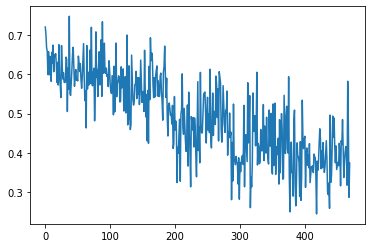

In [48]:
pd.Series(train_loss_history).plot()

# Validation accuracy curve
X-axis: Epochs, Y-axis: validation accuracy

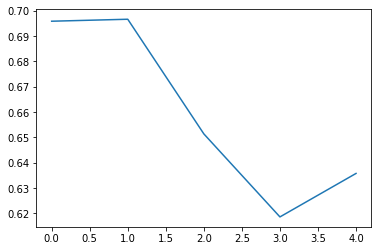

In [49]:
pd.Series(val_accuracy_history).plot()

# Test Accuracy

In [50]:
# Reload best model from saved checkpoint
# Compute test accuracy
model = torch.load('best_model.pt')
test_accuracy = evaluate(model, test_loader, device)


print(test_accuracy)

0.7020280811232449
